### Submitted by:
- Shahar Asher
- Hadar Liel Harush

In [391]:
import os, wave, sys
import numpy as np
%pip install matplotlib
import matplotlib.pyplot as plt
%pip install scipy
import scipy.signal as signal
from scipy.io.wavfile import read
from scipy.signal import spectrogram
# %pip install scikit-learn
# from sklearn.decomposition import PCA, FastICA

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [392]:
# --- 4 B ---

In [393]:
def get_wav_files_in_current_directory(directory):
    wav_files = [f"{directory}\\{file}" for file in os.listdir(directory) if file.endswith('.wav')]
    return wav_files

In [394]:
wav_files_in_current_directory = get_wav_files_in_current_directory(".\\sounds")

In [395]:
# --- plot ---

In [396]:
def normalize_audio(audio, target_amplitude=0.9):
    # Calculate the maximum absolute value in the audio signal
    max_amplitude = np.max(np.abs(audio))
    
    # Calculate the scaling factor to normalize the audio
    scale_factor = target_amplitude / max_amplitude
    
    # Normalize the audio by scaling it
    normalized_audio = audio * scale_factor
    
    return normalized_audio

In [397]:
def plot_waveform_and_spectrogram(wav_file):
    plt.rcParams["figure.figsize"] = [10, 6]
    plt.rcParams["figure.autolayout"] = True

    # Read the WAV file
    sample_rate, audio = read(wav_file)
    
    # Plot waveform
    plt.subplot(2, 1, 1)
    plt.plot(audio)
    plt.title("Waveform: " + wav_file)
    plt.ylabel("Amplitude")
    plt.xlabel("Time")

    # Plot spectrogram
    plt.subplot(2, 1, 2)
    plt.specgram(audio, Fs=sample_rate)
    plt.title("Spectrogram: " + wav_file)
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("Time [sec]")

    plt.show()

['.\\sounds\\source1.wav', '.\\sounds\\source2.wav', '.\\sounds\\source3.wav', '.\\sounds\\source4.wav', '.\\sounds\\source5.wav', '.\\sounds\\source6.wav']


c:\anaconda\Lib\site-packages\matplotlib\axes\_axes.py:7939: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


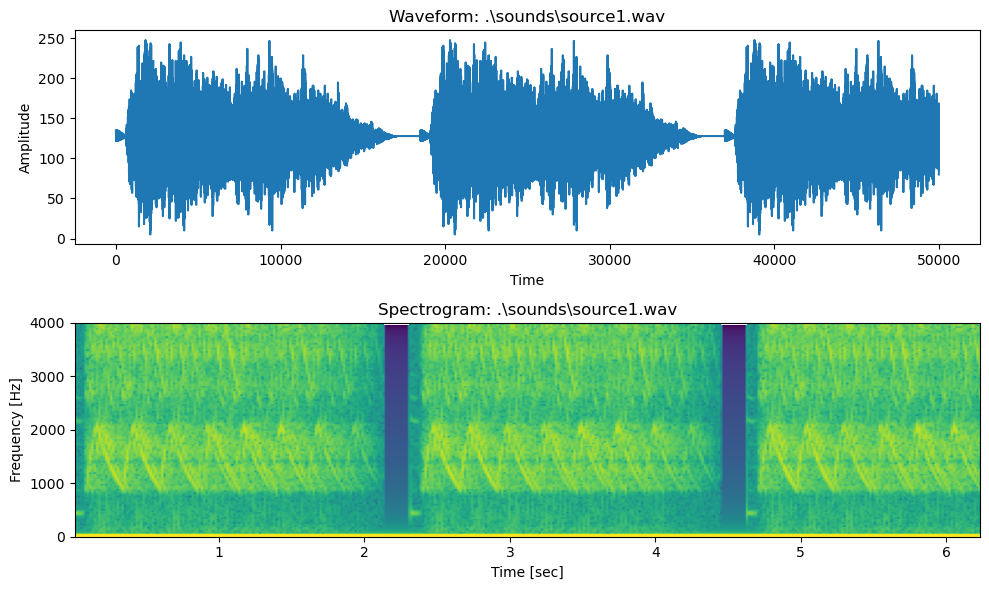

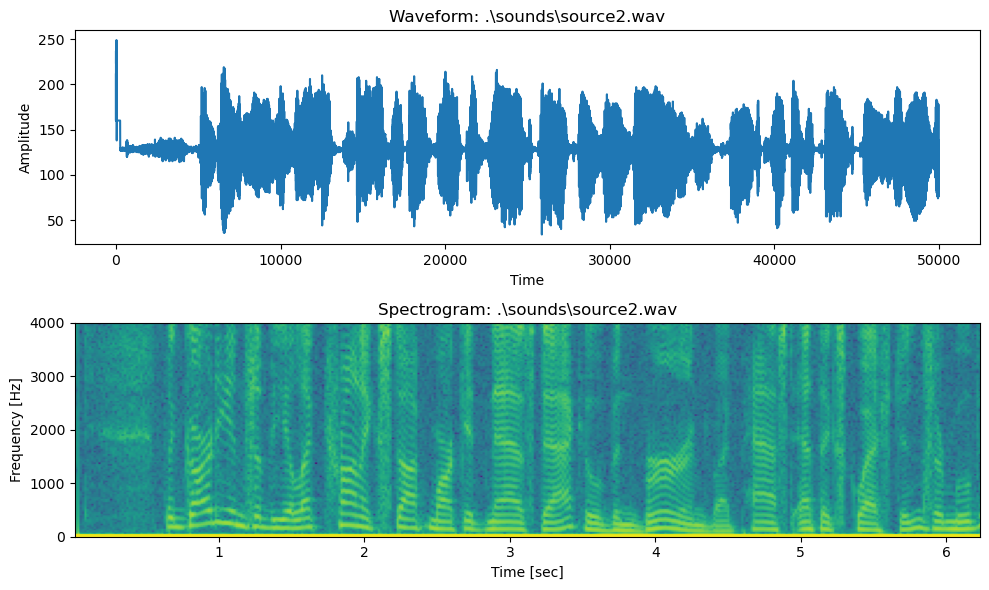

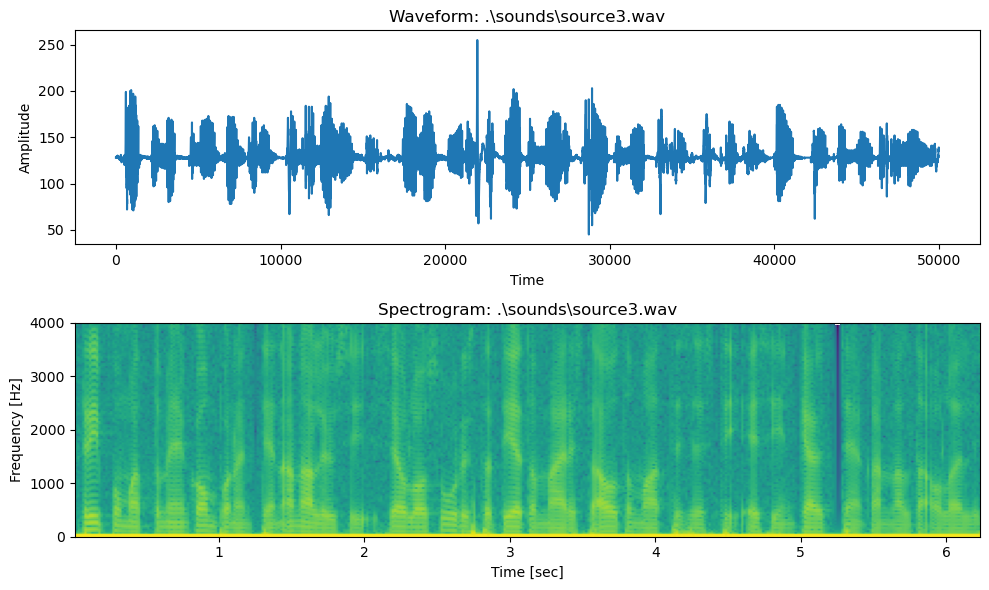

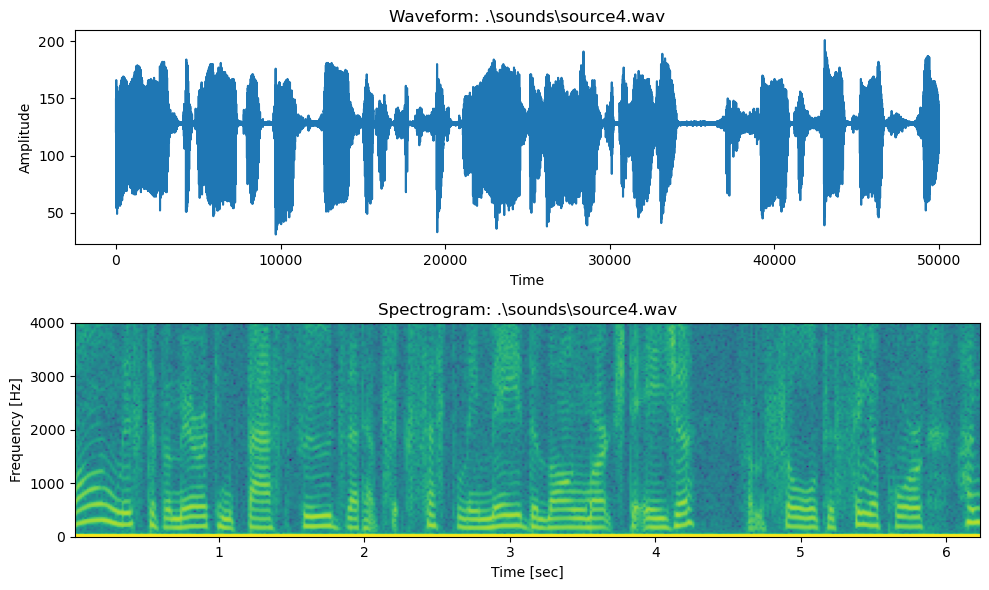

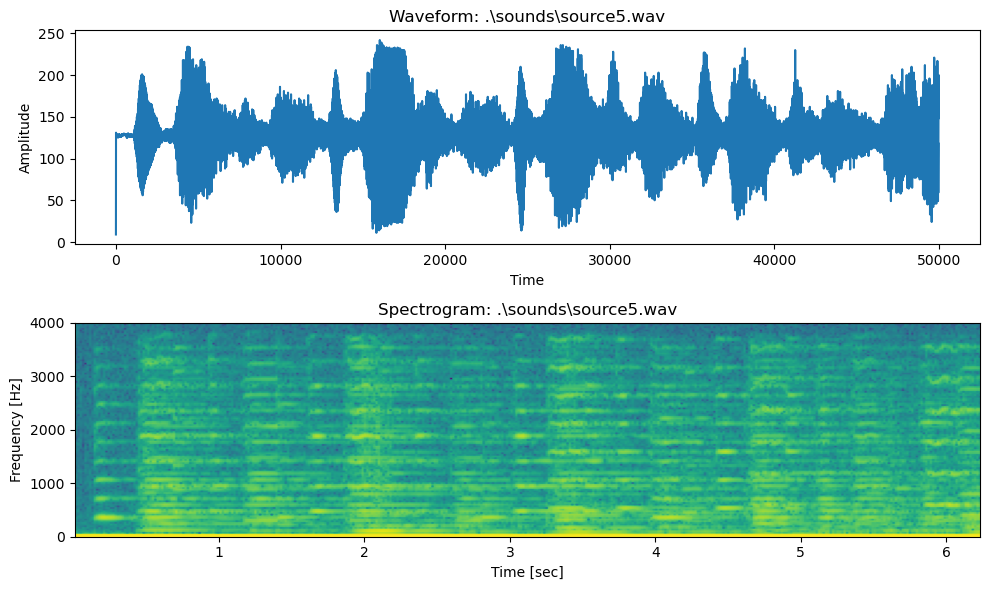

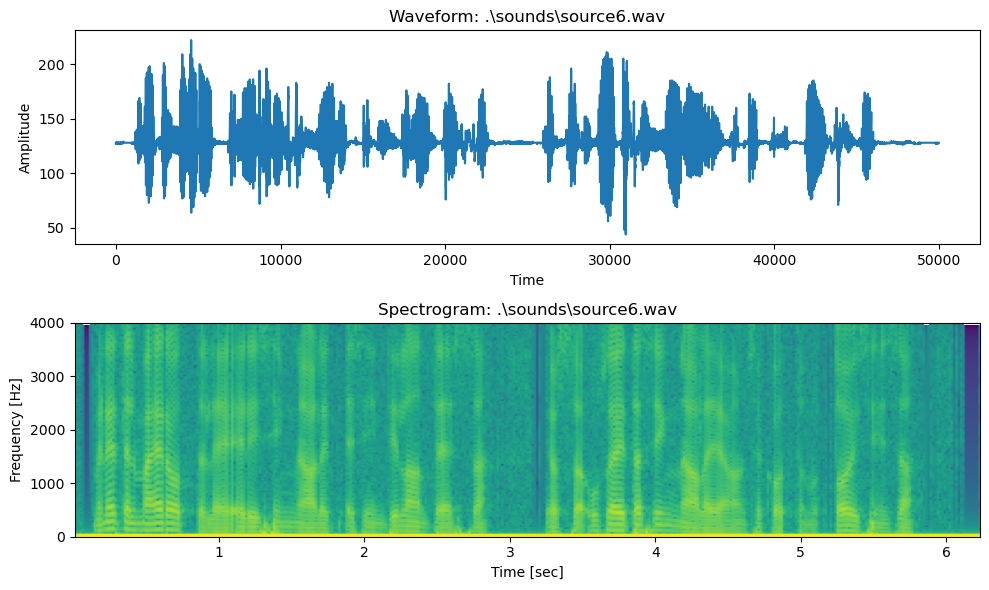

In [398]:
print(wav_files_in_current_directory)

# הצגת ספקטרוגרמה של כל קובץ קול בתיקייה הנוכחית
for wav_file in wav_files_in_current_directory:
    plot_waveform_and_spectrogram(wav_file)
    #plot_spectrogram(wav_file)